In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [ ]:
## Part1

In [ ]:
## Create training and validation data set

In [3]:
batch_size = 32
img_height = 224
img_width = 224


train_ds = tf.keras.utils.image_dataset_from_directory(
  r"E:\Simplelearn_AI and ML\capstone\Datasets\Capstone 2\Part 1\dataset_hist_structures 2\dataset_hist_structures\Stuctures_Dataset",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10543 files belonging to 11 classes.
Using 8435 files for training.


In [4]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  r"E:\Simplelearn_AI and ML\capstone\Datasets\Capstone 2\Part 1\dataset_hist_structures 2\dataset_hist_structures\Stuctures_Dataset",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10543 files belonging to 11 classes.
Using 2108 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['altar', 'apse', 'bell_tower', 'column', 'dome(inner)', 'dome(outer)', 'flying_buttress', 'gargoyle', 'portal', 'stained_glass', 'vault']


In [ ]:
## Plotting the sample images from each class or category

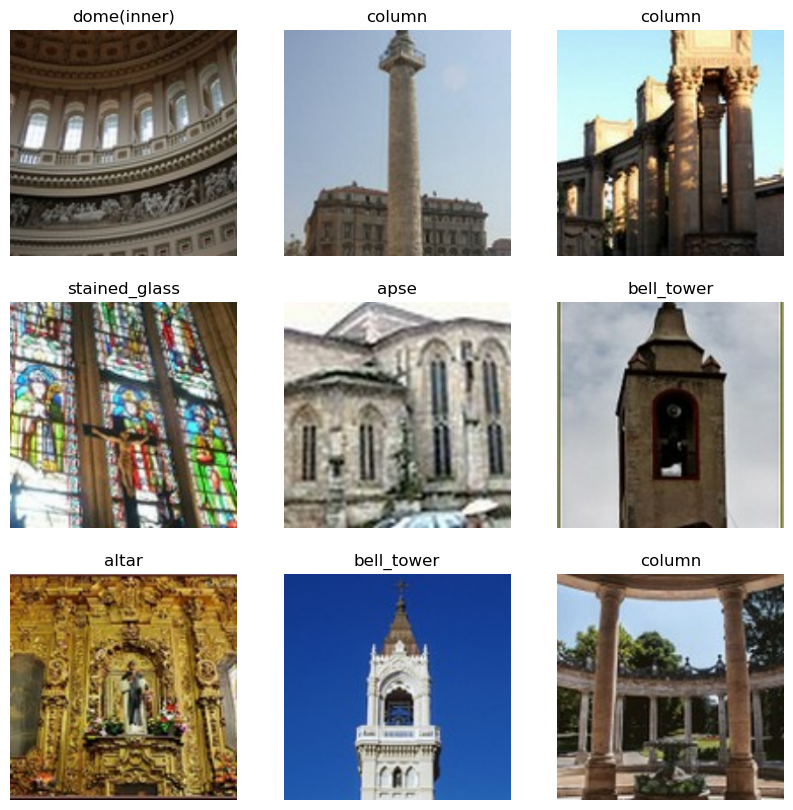

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
## Preprocessing and normalizing the training data set

In [7]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [8]:
normalization_layer = layers.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 0.93991464


In [ ]:
## Using trasfer learning

In [9]:
# define the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

In [10]:
from tensorflow.keras.applications.vgg16 import VGG16

In [11]:
base_model = VGG16(include_top=False)

In [12]:
for layer in base_model.layers:
    layer.trainable=False

In [13]:
model = Sequential()
model.add(Input(shape=(224,224,3)))

model.add(base_model)


# add flatten layer
model.add(Flatten())

# add FC Layer
model.add(Dense(64, activation='relu'))

# add Output Layer
model.add(Dense(11,activation='softmax'))



In [14]:
# compile model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 64)                1605696   
                                                                 
 dense_1 (Dense)             (None, 11)                715       
                                                                 
Total params: 16,321,099
Trainable params: 1,606,411
Non-trainable params: 14,714,688
_________________________________________________________________


In [16]:
# train the model
epochs=2
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/2
264/264 [==============================] - 1062s 4s/step - loss: 1.2720 - accuracy: 0.7874 - val_loss: 0.6837 - val_accuracy: 0.8738
Epoch 2/2
264/264 [==============================] - 1127s 4s/step - loss: 0.4543 - accuracy: 0.8937 - val_loss: 0.6693 - val_accuracy: 0.8781


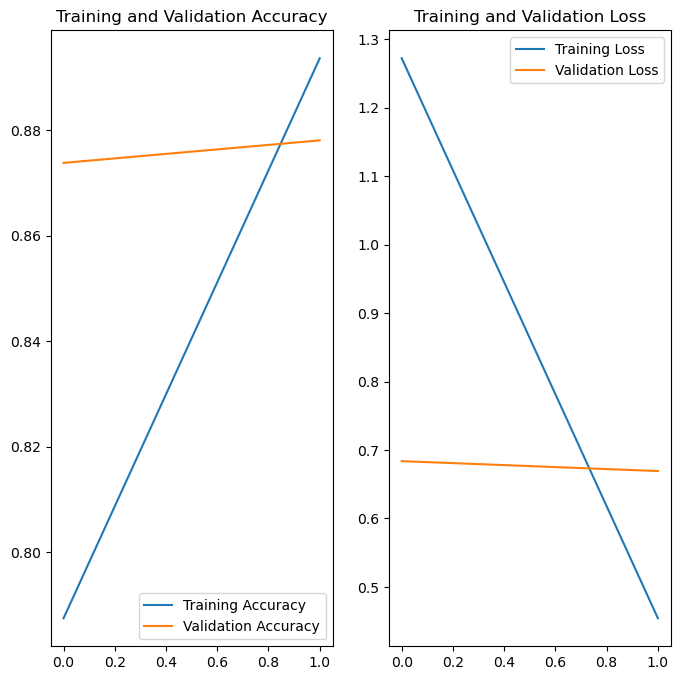

In [17]:
# Plotting training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:
## Creating a Convolutional Neural Network Model With Data Augmentation
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [18]:
num_classes = len(class_names)
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [19]:
model = Sequential()
model.add(Input(shape=(224,224,3)))
model.add(Conv2D(16,(3,3),activation ='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation ='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation ='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 64)      

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
264/264 [==============================] - 98s 371ms/step - loss: 1.7939 - accuracy: 0.4164 - val_loss: 1.6798 - val_accuracy: 0.4635
Epoch 2/20
264/264 [==============================] - 95s 360ms/step - loss: 1.1462 - accuracy: 0.6427 - val_loss: 1.7247 - val_accuracy: 0.4753
Epoch 3/20
264/264 [==============================] - 96s 362ms/step - loss: 0.5972 - accuracy: 0.8148 - val_loss: 2.1954 - val_accuracy: 0.4929
Epoch 4/20
264/264 [==============================] - 97s 367ms/step - loss: 0.2592 - accuracy: 0.9201 - val_loss: 2.2962 - val_accuracy: 0.4934
Epoch 5/20
264/264 [==============================] - 96s 362ms/step - loss: 0.1145 - accuracy: 0.9682 - val_loss: 3.0276 - val_accuracy: 0.5005
Epoch 6/20
264/264 [==============================] - 100s 381ms/step - loss: 0.0921 - accuracy: 0.9743 - val_loss: 3.1609 - val_accuracy: 0.4976
Epoch 7/20
264/264 [==============================] - 100s 380ms/step - loss: 0.0931 - accuracy: 0.9730 - val_loss: 3.2067 - val_

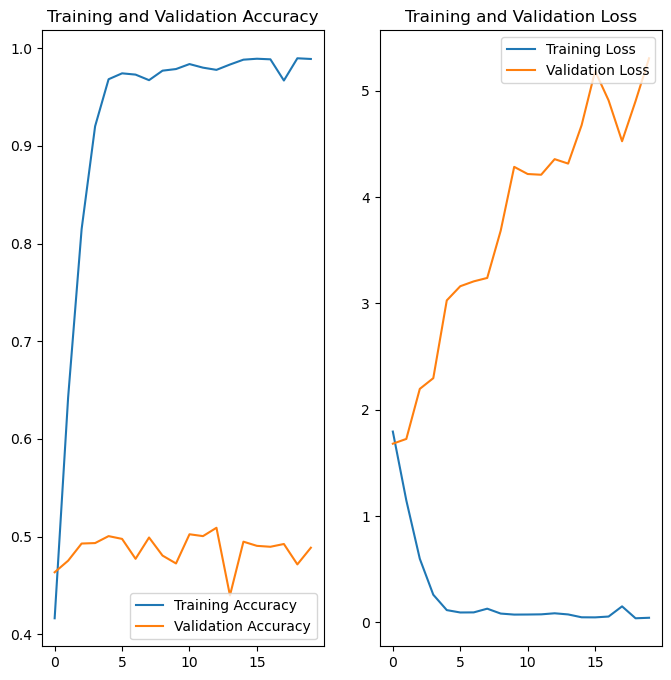

In [24]:
# Plotting training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [25]:
## part2

In [26]:
# Importing the data
import pandas as pd
df1 = pd.read_csv(r"E:\Simplelearn_AI and ML\capstone\Datasets\Capstone 2\Part 2\tourism_rating.csv")
P2 = pd.ExcelFile(r"E:\Simplelearn_AI and ML\capstone\Datasets\Capstone 2\Part 2\tourism_with_id.xlsx")
df2 = pd.read_excel(P2,'tourism_with_id')
df3 = pd.read_csv(r"E:\Simplelearn_AI and ML\capstone\Datasets\Capstone 2\Part 2\user.csv")

In [27]:
df3

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20
...,...,...,...
295,296,"Lampung, Sumatera Selatan",31
296,297,"Palembang, Sumatera Selatan",39
297,298,"Bogor, Jawa Barat",38
298,299,"Sragen, Jawa Tengah",27


In [28]:
# Data quality check by checking for missing values
df1.isnull().values.any()
df1.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64

In [29]:
df2.isnull().values.any()
df2.isnull().sum()

Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
dtype: int64

In [30]:
mean_value = df2['Time_Minutes'].mean() 

In [32]:
df2['Time_Minutes'].fillna(value=mean_value, inplace=True)
df2

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.000000,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.000000,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.000000,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,82.609756,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.000000,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134
...,...,...,...,...,...,...,...,...,...,...,...
432,433,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Budaya,Surabaya,2000,4.4,45.000000,"{'lat': -7.4338593, 'lng': 112.7199058}",-7.433859,112.719906
433,434,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Taman Hiburan,Surabaya,0,4.6,82.609756,"{'lat': -7.291346799999999, 'lng': 112.7398218}",-7.291347,112.739822
434,435,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Taman Hiburan,Surabaya,0,4.4,45.000000,"{'lat': -7.2752955, 'lng': 112.7549381}",-7.275296,112.754938
435,436,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,Surabaya,0,4.6,82.609756,"{'lat': -7.294330299999999, 'lng': 112.7617534}",-7.294330,112.761753


In [33]:
df2.isnull().values.any()
df2.isnull().sum()

Place_Id        0
Place_Name      0
Description     0
Category        0
City            0
Price           0
Rating          0
Time_Minutes    0
Coordinate      0
Lat             0
Long            0
dtype: int64

In [ ]:
## Age distribution of the visitors

<Figure size 1200x600 with 0 Axes>

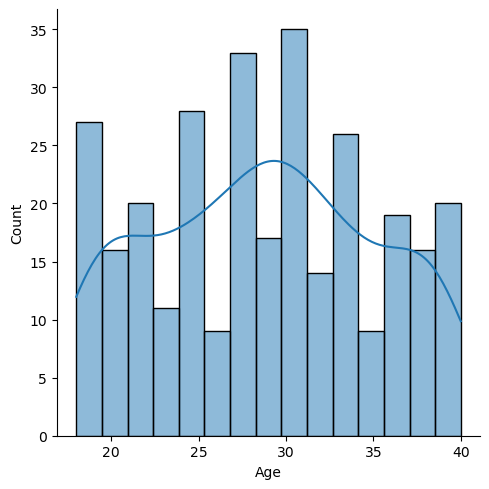

In [34]:
import seaborn as sns
#create histogram with density curve overlaid
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.displot(df3['Age'], kde=True, bins=15)
plt.show()

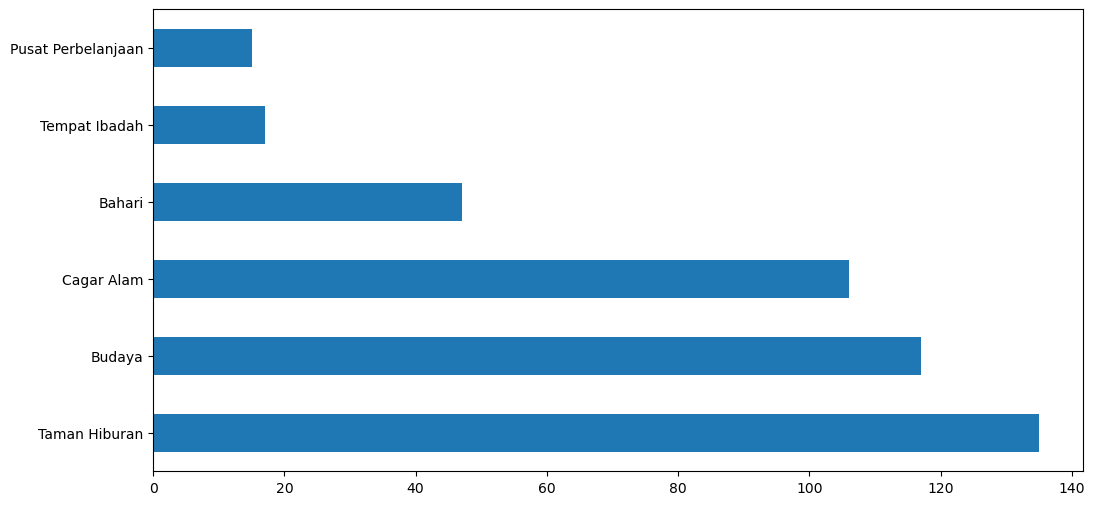

In [35]:
## Different categories of of tourist plots
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
#df2['Category'].value_counts()
df2['Category'].value_counts().plot(kind='barh')
plt.show()

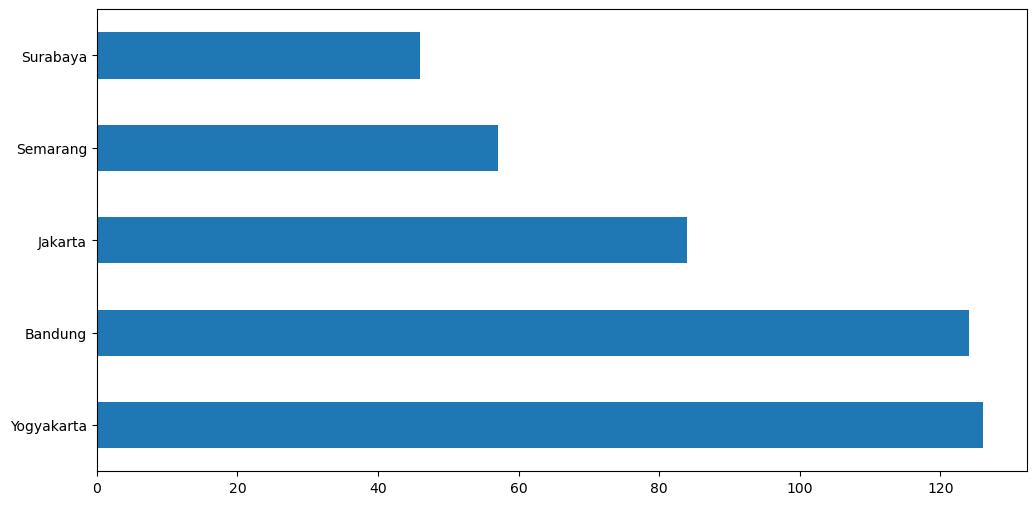

In [36]:
## Different cities
plt.figure(figsize=(12, 6))
#df2['Category'].value_counts()
df2['City'].value_counts().plot(kind='barh')
plt.show()

In [37]:
# Create a pivot table to construct the user-item rating matrix
rating_matrix = df1.pivot_table(index='User_Id', columns='Place_Id', values='Place_Ratings')

# Fill missing values (NaN) with 0
rating_matrix = rating_matrix.fillna(0)

# Display the first few rows of the user-item rating matrix
rating_matrix.head()

Place_Id,1,2,3,4,5,6,7,8,9,10,...,428,429,430,431,432,433,434,435,436,437
User_Id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,5.0,0.0


In [40]:

import statistics

# Calculate the number of ratings per user
ratings_per_user = df1.groupby('User_Id')['Place_Ratings'].count()
ratings_per_user

User_Id
1      30
2      29
3      30
4      26
5      33
       ..
296    36
297    36
298    30
299    39
300    26
Name: Place_Ratings, Length: 300, dtype: int64

In [41]:
# Calculate the number of ratings per place
ratings_per_place = df1.groupby('Place_Id')['Place_Ratings'].count()
ratings_per_place

Place_Id
1      18
2      25
3      19
4      21
5      25
       ..
433    23
434    25
435    17
436    22
437    38
Name: Place_Ratings, Length: 437, dtype: int64

In [49]:
## cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
import operator

def similar_users(user_id, matrix, k=3):
    # Retrieve the user's vector from the rating matrix
    similarities = cosine_similarity(matrix)
    sim = pd.DataFrame(similarities,index=matrix.index,columns=matrix.index)
    users=sim[user_id].sort_values(ascending=False).head(k+1)[1:].index.tolist()
    return users

In [43]:
similar_user_indices = similar_users(226,rating_matrix)

In [44]:
similar_user_indices

[9, 246, 129]

In [46]:
similar_users = rating_matrix[rating_matrix.index.isin(similar_user_indices)]
similar_users = similar_users.mean(axis=0)
similar_users_df = pd.DataFrame(similar_users, columns=['mean'])

In [47]:
similar_users

Place_Id
1      0.000000
2      0.000000
3      0.000000
4      0.000000
5      0.000000
         ...   
433    0.000000
434    0.000000
435    0.000000
436    0.000000
437    1.333333
Length: 437, dtype: float64

In [51]:
## recommend the item
def recommend_item(user_index, similar_user_indices, matrix, items=5):
    # Calculate mean rating for each item among similar users
    similar_users_mean = matrix.loc[similar_user_indices].mean()
    
    # Select the target user's ratings
    user_ratings = matrix.loc[user_index]
    
    # Filter out items that the target user has already rated
    unseen_items = user_ratings[user_ratings == 0].index
    
    # Filter the similar users' mean ratings to include only unseen items
    similar_users_mean_unseen = similar_users_mean.loc[unseen_items]
    
    # Sort items by mean rating in descending order and select the top n items
    top_n_anime = similar_users_mean_unseen.nlargest(items)
    
    # Retrieve information about the recommended anime
    anime_information = df2[df2['Place_Id'].isin(top_n_anime.index)]
    
    return anime_information

recommend_item(55, similar_user_indices, rating_matrix)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
27,28,Wisata Agro Edukatif Istana Susu Cibugary,Kawasan Wisata Agro Edukatif Istana Susu ‚ÄúCi...,Taman Hiburan,Jakarta,35000,4.5,82.609756,"{'lat': -6.3568093, 'lng': 106.9062371}",-6.356809,106.906237
54,55,Klenteng Jin De Yuan,"Kelenteng Kim Tek Le, atau yang lebih dikenal ...",Tempat Ibadah,Jakarta,0,4.5,82.609756,"{'lat': -6.144473700000001, 'lng': 106.8126018}",-6.144474,106.812602
210,211,GunungTangkuban perahu,Gunung Tangkuban Parahu adalah salah satu gunu...,Cagar Alam,Bandung,30000,4.5,82.609756,"{'lat': -6.759637700000001, 'lng': 107.6097807}",-6.759638,107.609781
245,246,Curug Tilu Leuwi Opat,Curug Tilu Leuwi Opat merupakan salah satu wis...,Cagar Alam,Bandung,10000,4.4,120.000000,"{'lat': -6.790569199999999, 'lng': 107.5826388}",-6.790569,107.582639
318,319,Kawah Rengganis Cibuni,Kawasan Bandung Selatan khususnya Ciwidey mema...,Cagar Alam,Bandung,5000,4.3,82.609756,"{'lat': -7.172412599999999, 'lng': 107.3766656}",-7.172413,107.376666
